<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-wa

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/Churn.csv')

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
ds.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
ds.shape

(10000, 14)

### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [ ]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Checking for unique values for each of the column

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

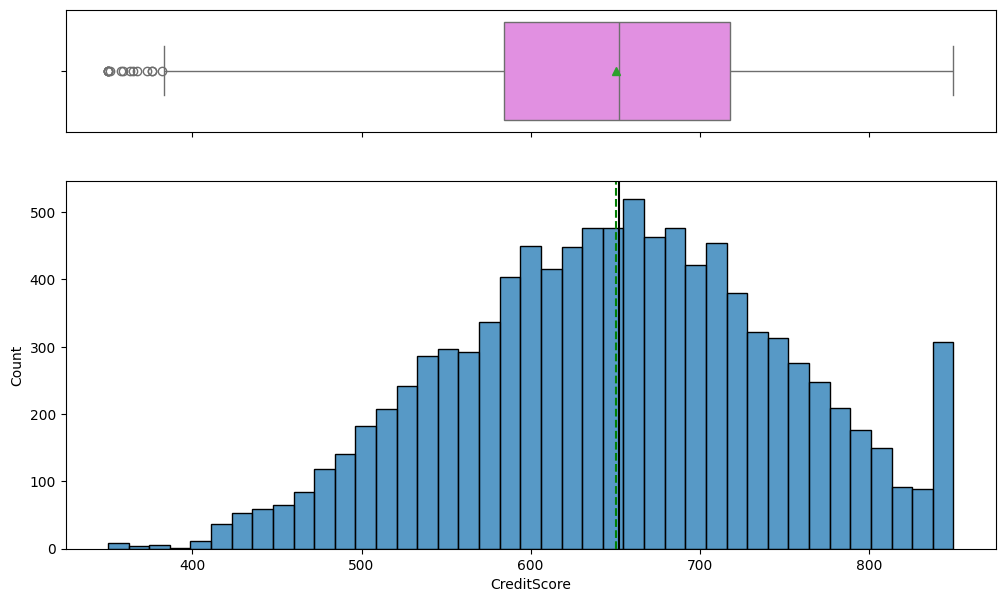

In [ ]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

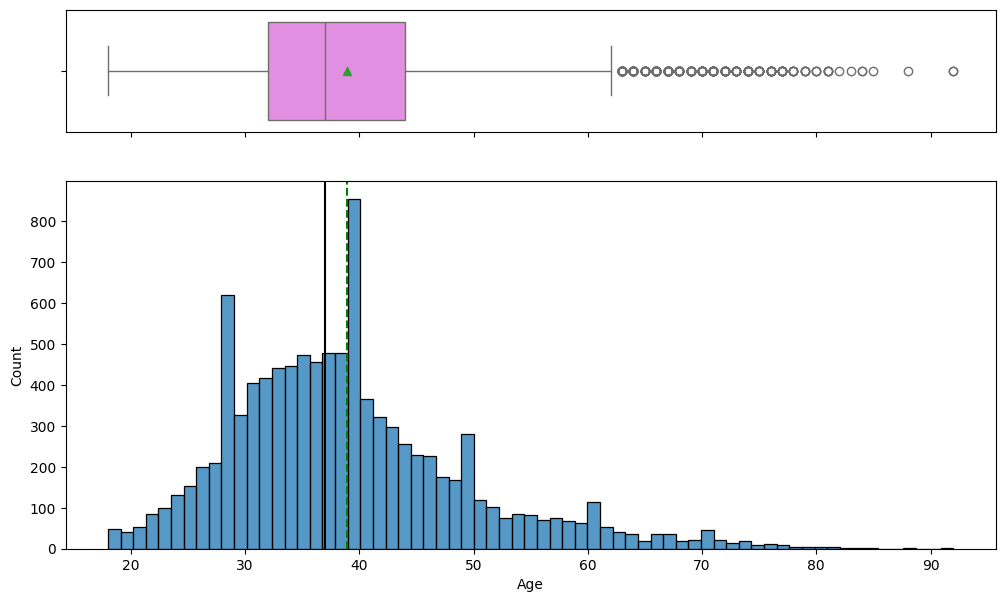

In [ ]:
histogram_boxplot(ds,'Age')

#### Observations on Balance

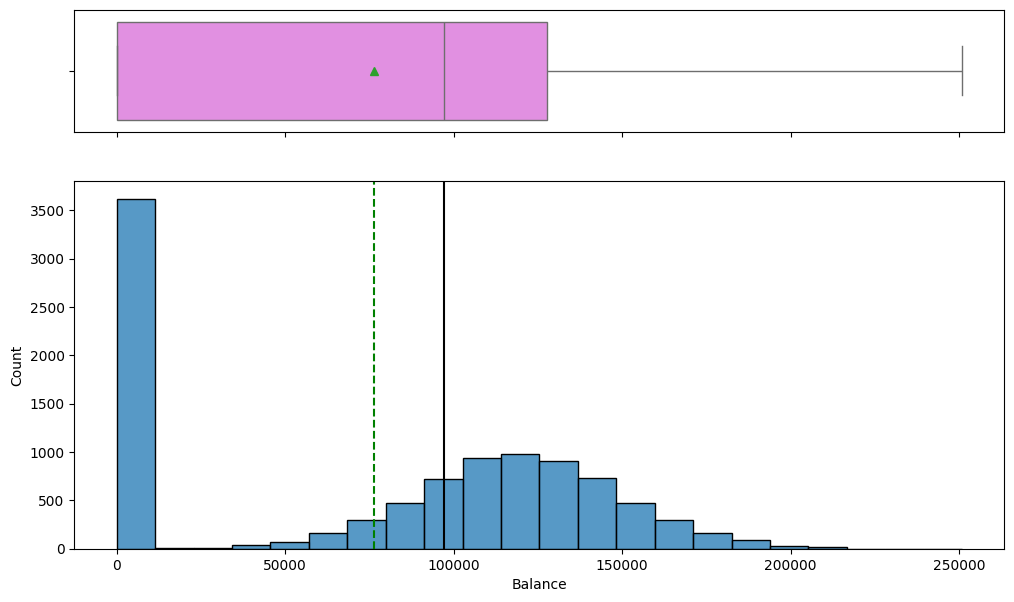

In [ ]:
histogram_boxplot(ds,'Balance')

#### Observations on Estimated Salary

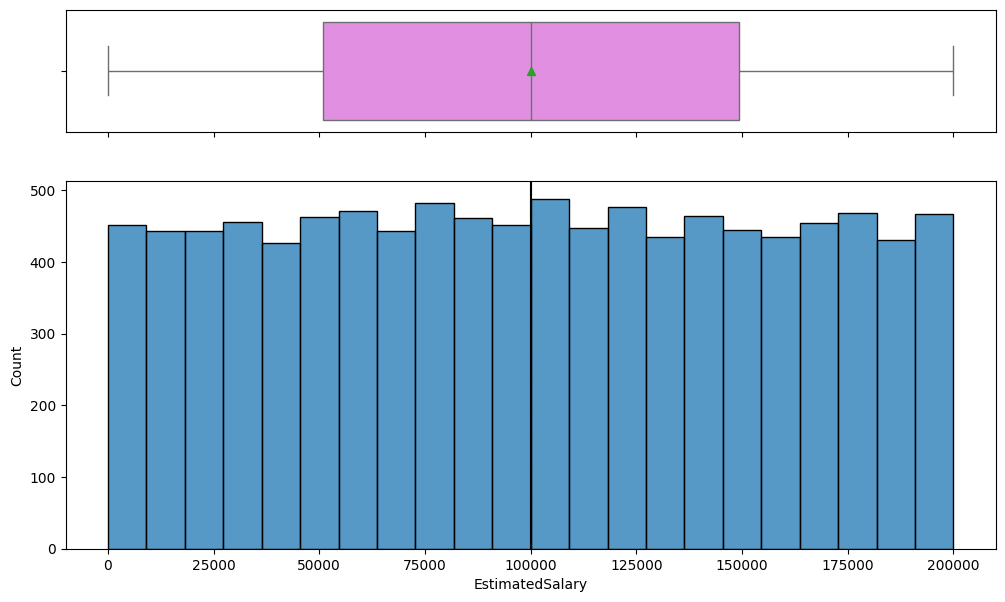

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')

#### Observations on Exited

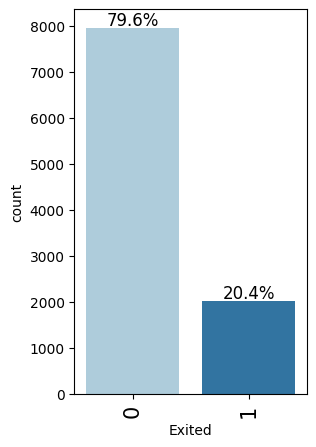

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

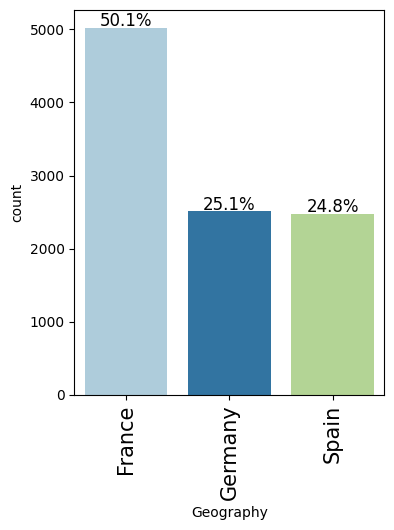

In [ ]:
labeled_barplot(ds, "Geography", perc=True)

#### Observations on Gender

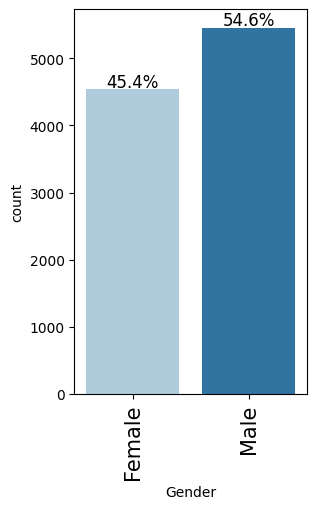

In [ ]:
labeled_barplot(ds, "Gender", perc=True)

#### Observations on Tenure

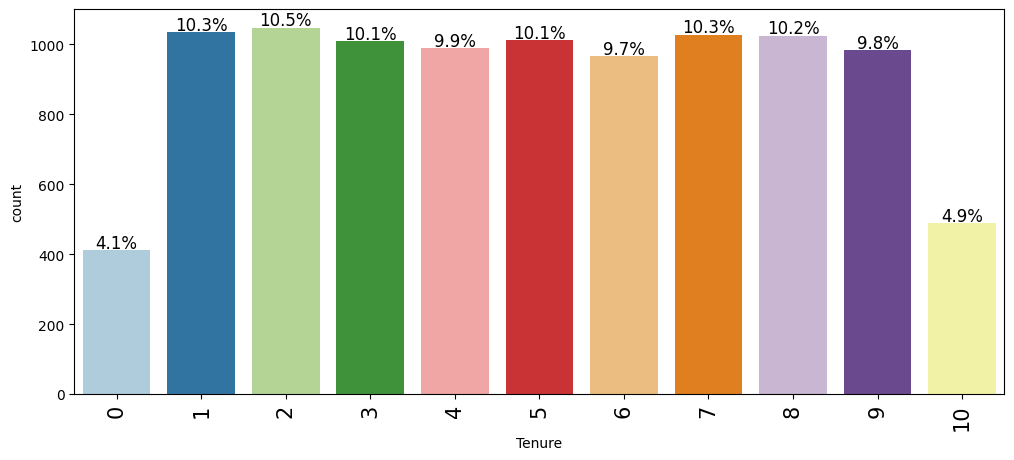

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)

#### Observations on Number of Products

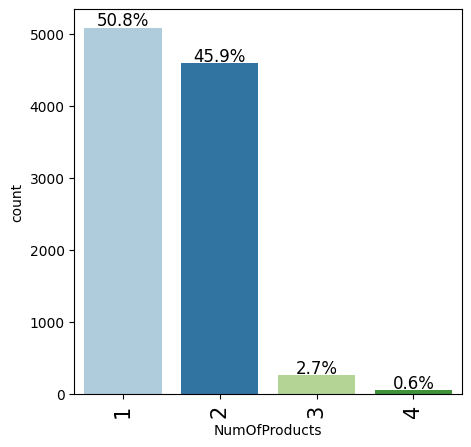

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)

#### Observations on Has Credit Card

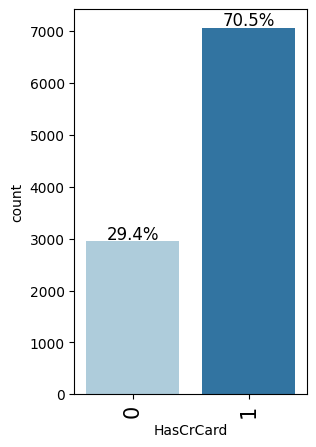

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

#### Observations on Is Active Member

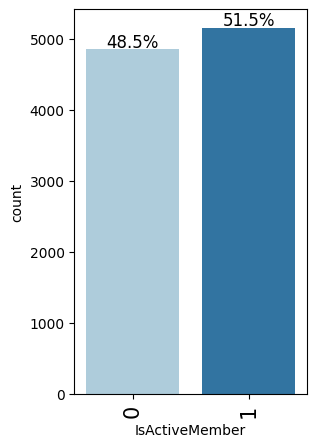

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

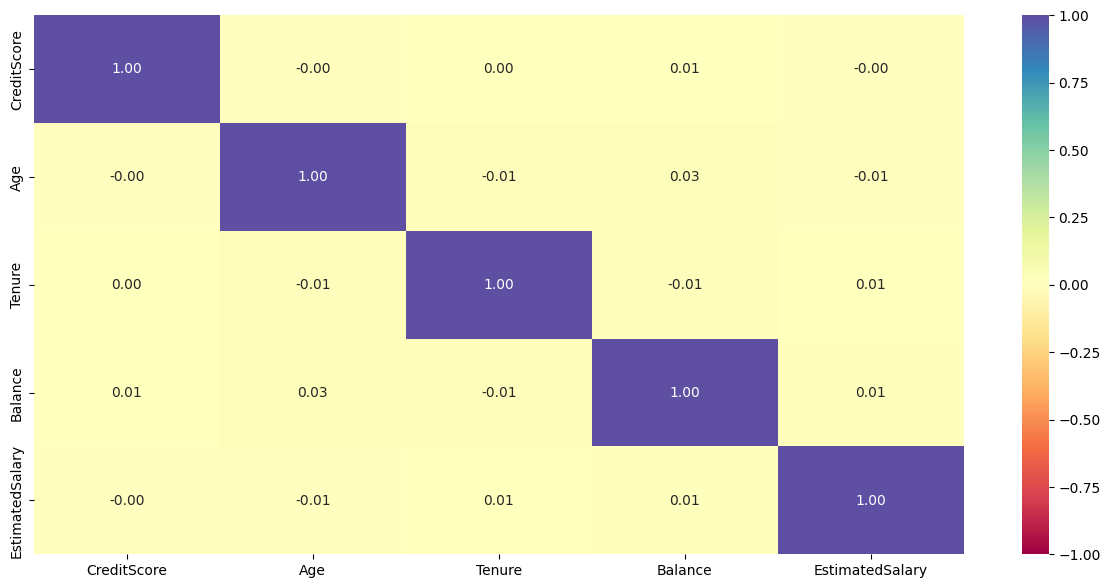

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


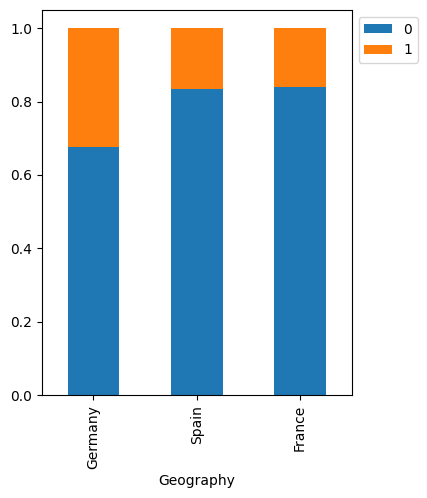

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


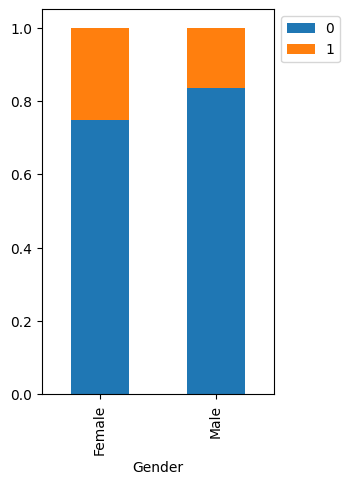

In [ ]:
stacked_barplot(ds, "Gender", "Exited")                   ## Complete the code to plot stacked barplot for Exited and Gender

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


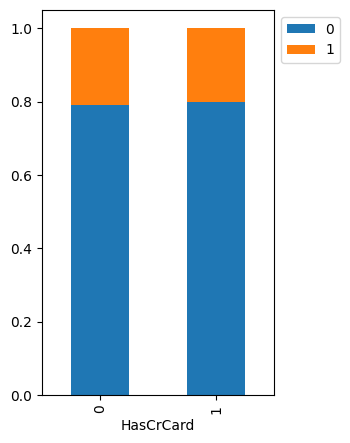

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited")                   ## Complete the code to plot stacked barplot for Exited and Has credit card

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


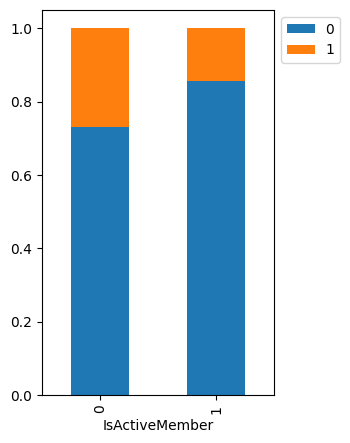

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   ## Complete the code to plot stacked barplot for Exited and Is active member

#### Exited Vs Credit Score

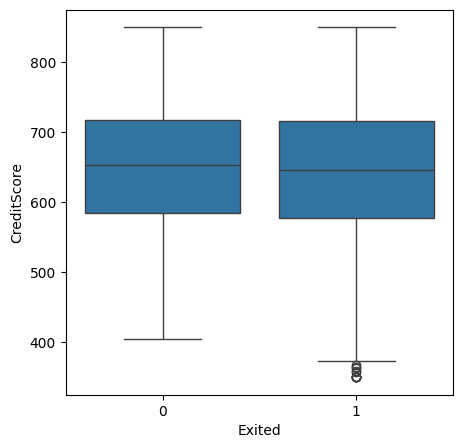

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

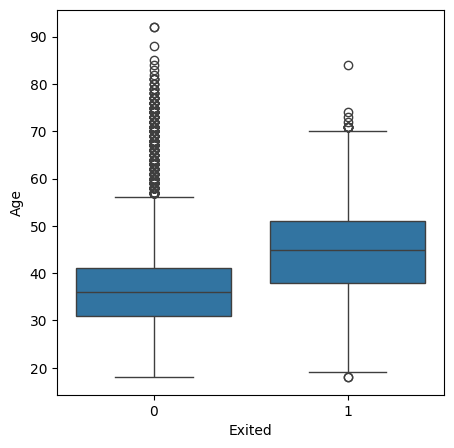

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

#### Exited Vs Tenure

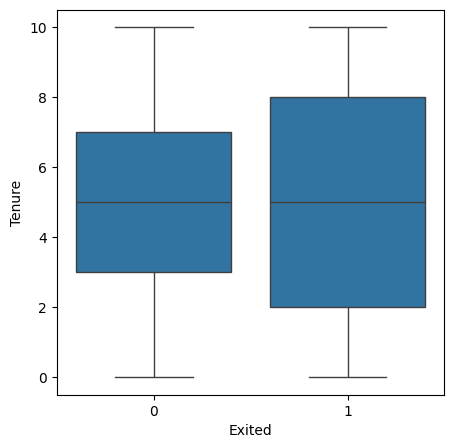

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Tenure
plt.show()

#### Exited Vs Balance

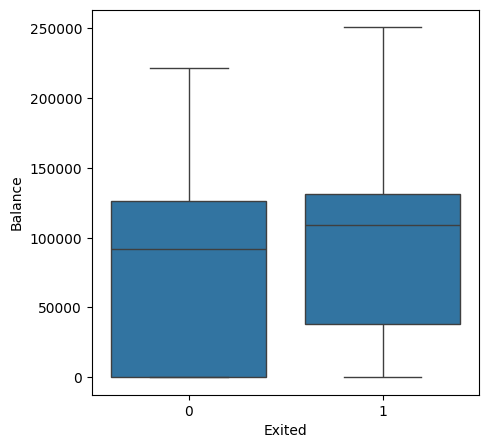

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Balance
plt.show()

#### Exited Vs Number of Products

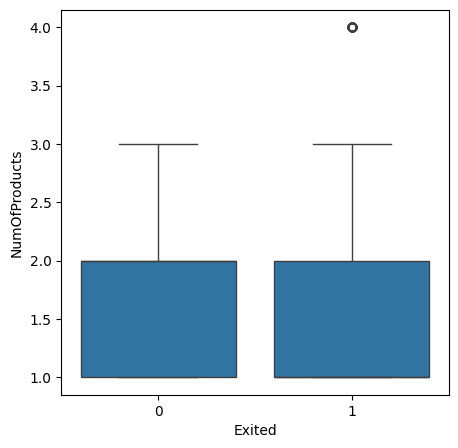

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Number of products
plt.show()

#### Exited Vs Estimated Salary

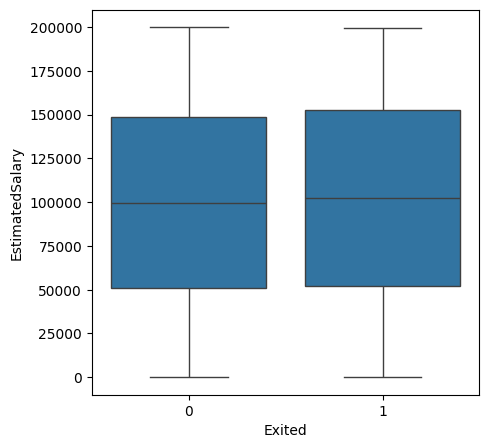

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = .1764, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(7000, 11) (1500, 11) (1500, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(7000,) (1500,) (1500,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_0.add(Dense(1, activation='relu'))
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.001)

# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 835 (3.26 KB)

 Trainable params: 835 (3.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.7327 - recall: 0.6784 - val_loss: 0.6996 - val_recall: 0.3574
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6916 - recall: 0.2952 - val_loss: 0.6701 - val_recall: 0.1115
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6648 - recall: 0.0599 - val_loss: 0.6488 - val_recall: 0.0098
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6451 - recall: 0.0073 - val_loss: 0.6324 - val_recall: 0.0066
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6298 - recall: 0.0000e+00 - val_loss: 0.6191 - val_recall: 0.0000e+00
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6172 - recall: 0.0000e+00 - val_loss: 0.6077 - val_recall: 0.0000e+00
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6064 - recall: 0.0000e+00 - val_loss: 0.5978 - val_recall: 0.0000e+00
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5969 - recall: 0.0000e+00 - val_loss: 0.5891 -

**Loss function**

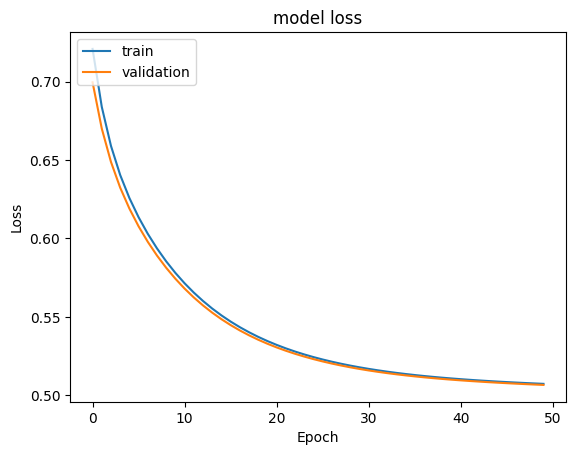

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

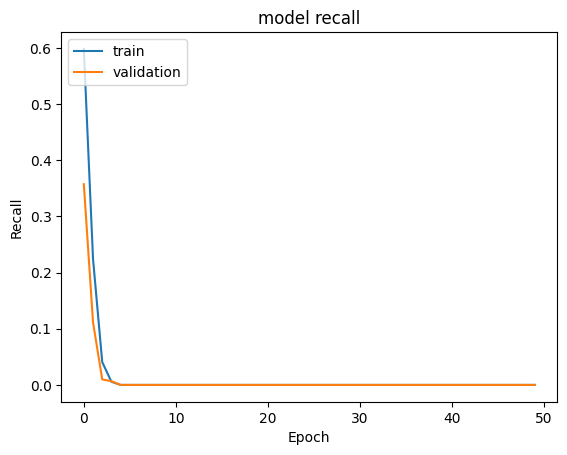

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5574
           1       0.00      0.00      0.00      1426

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.80      0.71      7000



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1195
           1       0.00      0.00      0.00       305

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.63      0.80      0.71      1500



**Confusion matrix**

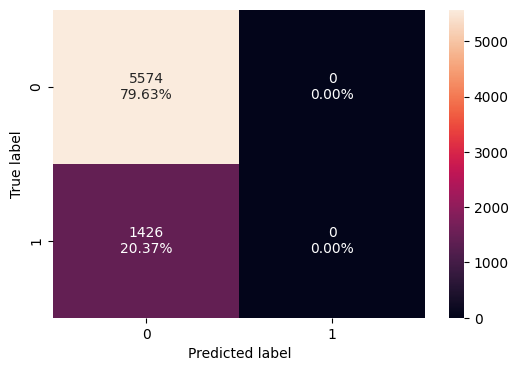

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

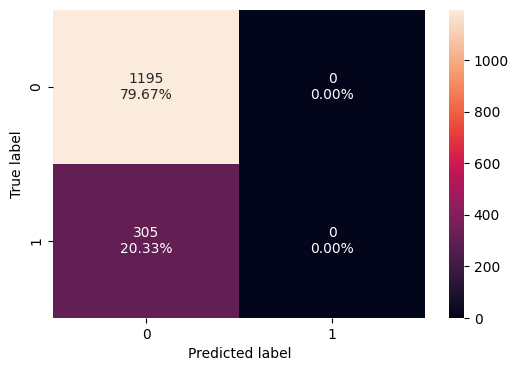

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_1.add(Dense(1, activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()

# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 835 (3.26 KB)

 Trainable params: 835 (3.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6862 - recall: 0.1536 - val_loss: 0.6367 - val_recall: 0.0033
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6259 - recall: 0.0162 - val_loss: 0.5882 - val_recall: 0.0754
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5805 - recall: 0.1234 - val_loss: 0.5456 - val_recall: 0.2328
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5421 - recall: 0.2277 - val_loss: 0.5119 - val_recall: 0.2852
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5120 - recall: 0.2704 - val_loss: 0.4857 - val_recall: 0.3148
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4885 - recall: 0.2890 - val_loss: 0.4667 - val_recall: 0.3672
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4694 - recall: 0.3179 - val_loss: 0.4502 - val_recall: 0.3607
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4543 - recall: 0.3214 - val_loss: 0.4376 - val_recall: 0.3803
Epoch 9

**Loss function**

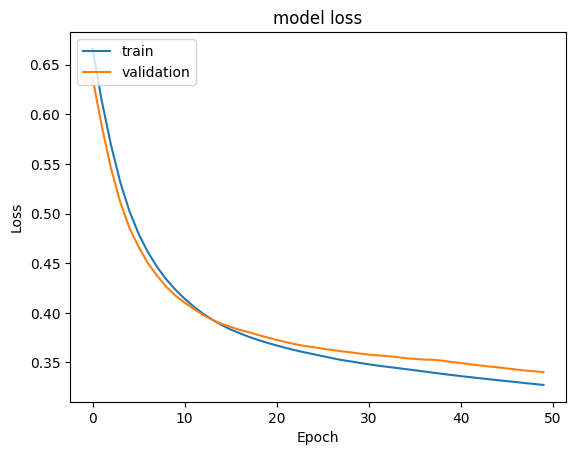

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

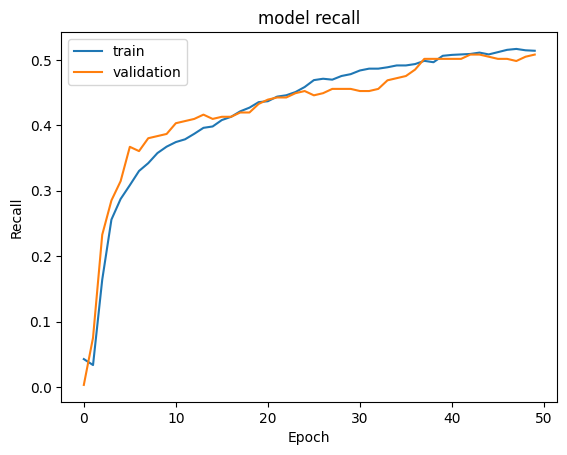

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5574
           1       0.76      0.55      0.64      1426

    accuracy                           0.87      7000
   macro avg       0.83      0.75      0.78      7000
weighted avg       0.87      0.87      0.87      7000



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1195
           1       0.74      0.51      0.60       305

    accuracy                           0.86      1500
   macro avg       0.81      0.73      0.76      1500
weighted avg       0.85      0.86      0.85      1500



**Confusion matrix**

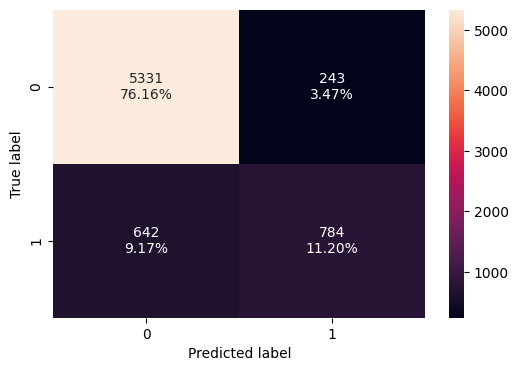

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

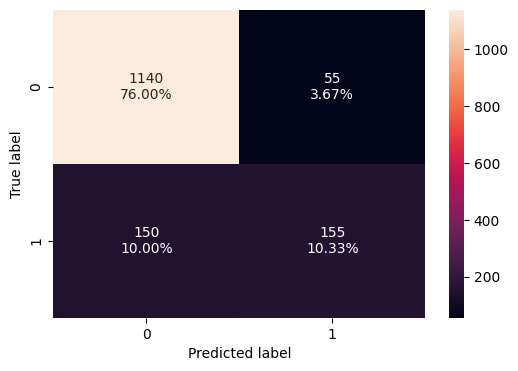

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_2.add(Dropout(0.2))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()

# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["recall"])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4996 - recall: 0.0286 - val_loss: 0.4381 - val_recall: 0.1410
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4450 - recall: 0.1641 - val_loss: 0.4232 - val_recall: 0.3311
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4305 - recall: 0.2407 - val_loss: 0.4113 - val_recall: 0.4262
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4162 - recall: 0.3065 - val_loss: 0.3984 - val_recall: 0.4623
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4071 - recall: 0.3683 - val_loss: 0.3849 - val_recall: 0.4885
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3988 - recall: 0.3636 - val_loss: 0.3683 - val_recall: 0.4590
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3954 - recall: 0.3804 - val_loss: 0.3590 - val_recall: 0.4590
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3818 - recall: 0.3761 - val_loss: 0.3476 - val_recall: 0.5049
Epoch 9

**Loss function**

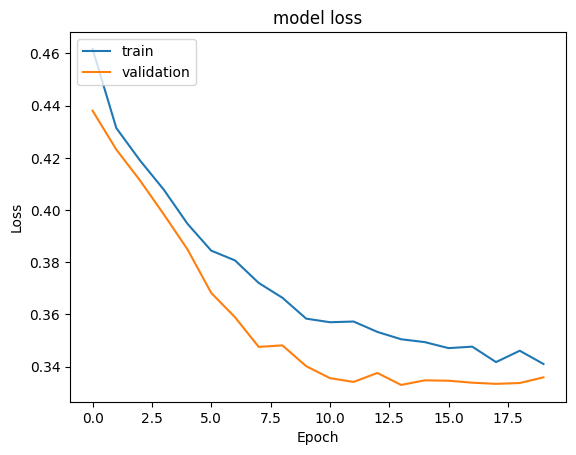

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

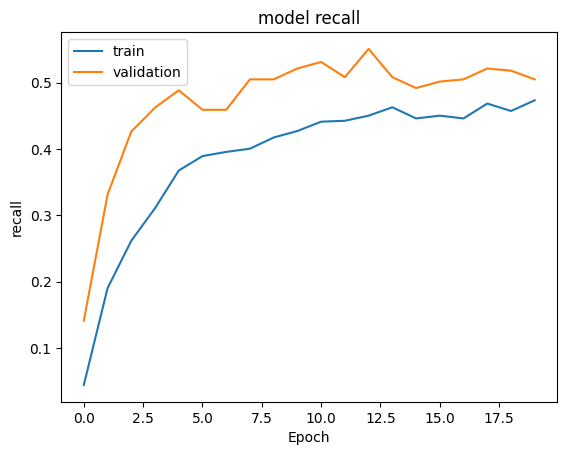

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5574
           1       0.81      0.51      0.63      1426

    accuracy                           0.88      7000
   macro avg       0.85      0.74      0.78      7000
weighted avg       0.87      0.88      0.86      7000



In [ ]:
#classification report
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1195
           1       0.75      0.50      0.60       305

    accuracy                           0.86      1500
   macro avg       0.82      0.73      0.76      1500
weighted avg       0.86      0.86      0.85      1500



**Confusion matrix**

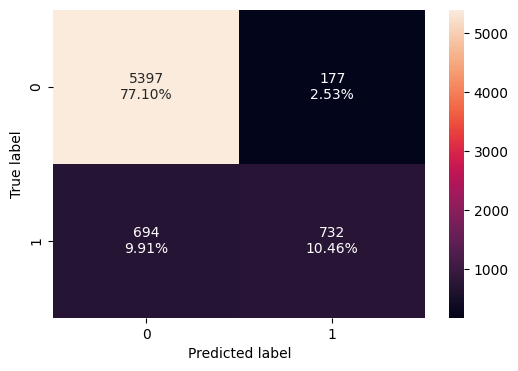

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

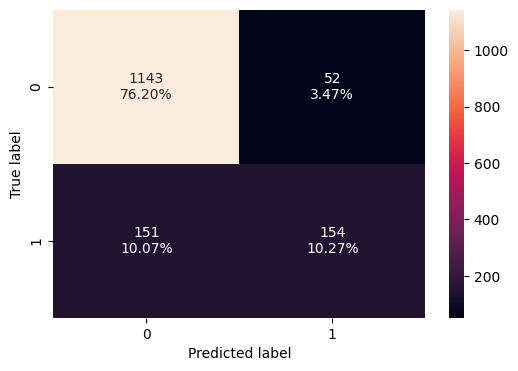

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (11148, 11)
After UpSampling, the shape of train_y: (11148,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.001)

# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=60,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7026 - recall: 0.9436 - val_loss: 0.7348 - val_recall: 0.9443
Epoch 2/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6986 - recall: 0.9296 - val_loss: 0.7242 - val_recall: 0.9279
Epoch 3/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6953 - recall: 0.9117 - val_loss: 0.7147 - val_recall: 0.8918
Epoch 4/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6921 - recall: 0.8745 - val_loss: 0.7046 - val_recall: 0.8426
Epoch 5/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6880 - recall: 0.8066 - val_loss: 0.6917 - val_recall: 0.7869
Epoch 6/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6824 - recall: 0.7320 - val_loss: 0.6789 - val_recall: 0.7279
Epoch 7/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6770 - recall: 0.6903 - val_loss: 0.6683 - val_recall: 0.6984
Epoch 8/60
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6721 - recall: 0.6654 - val_loss: 0.6592 - val_recall: 0.6754
Epoch 9/

**Loss function**

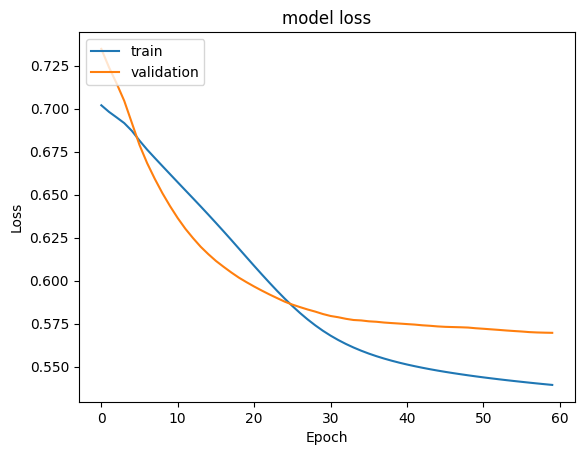

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

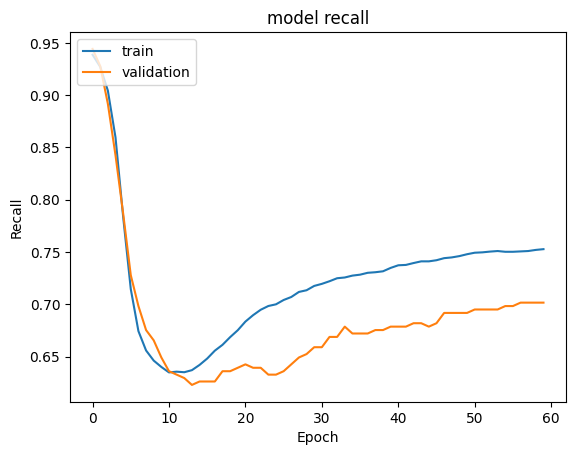

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      5574
           1       0.73      0.75      0.74      5574

    accuracy                           0.74     11148
   macro avg       0.74      0.74      0.74     11148
weighted avg       0.74      0.74      0.74     11148



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1195
           1       0.39      0.70      0.50       305

    accuracy                           0.71      1500
   macro avg       0.65      0.71      0.65      1500
weighted avg       0.80      0.71      0.74      1500



**Confusion matrix**

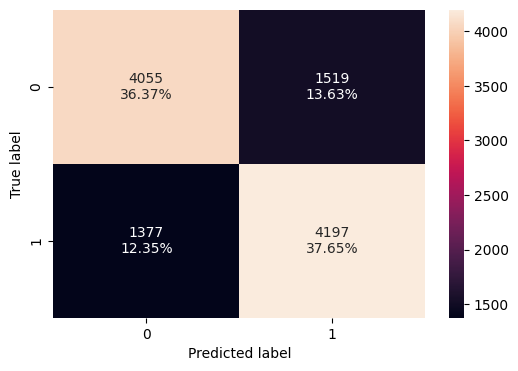

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

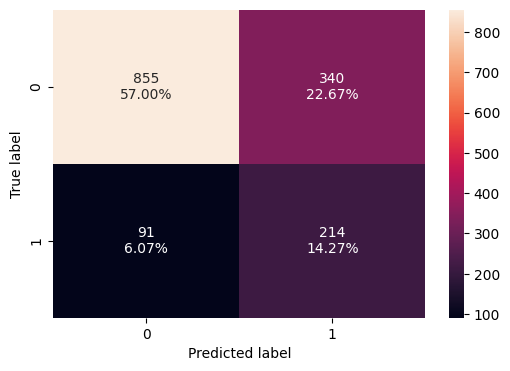

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
model_4.add(Dense(8,activation='relu'))
model_4.add(Dense(4,activation='relu'))
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()

# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=40,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4685 - recall: 0.7850 - val_loss: 0.5094 - val_recall: 0.6885
Epoch 2/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4557 - recall: 0.7925 - val_loss: 0.4960 - val_recall: 0.6951
Epoch 3/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4454 - recall: 0.8028 - val_loss: 0.4816 - val_recall: 0.6754
Epoch 4/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4365 - recall: 0.8088 - val_loss: 0.4700 - val_recall: 0.6852
Epoch 5/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4283 - recall: 0.8126 - val_loss: 0.4587 - val_recall: 0.6787
Epoch 6/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4211 - recall: 0.8144 - val_loss: 0.4485 - val_recall: 0.6754
Epoch 7/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4152 - recall: 0.8181 - val_loss: 0.4416 - val_recall: 0.6721
Epoch 8/40
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4097 - recall: 0.8190 - val_loss: 0.4341 - val_recall: 0.6787
Epoch 9/

**Loss function**

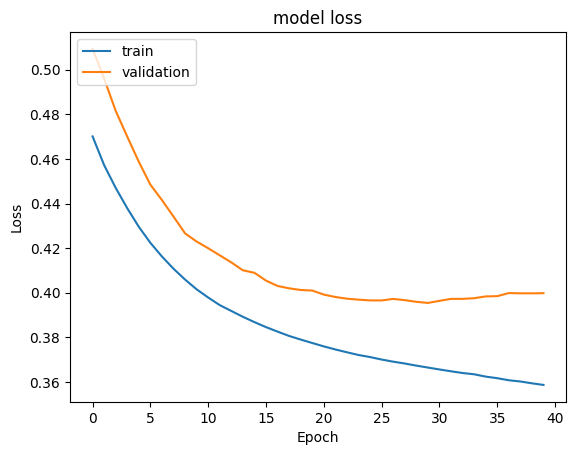

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

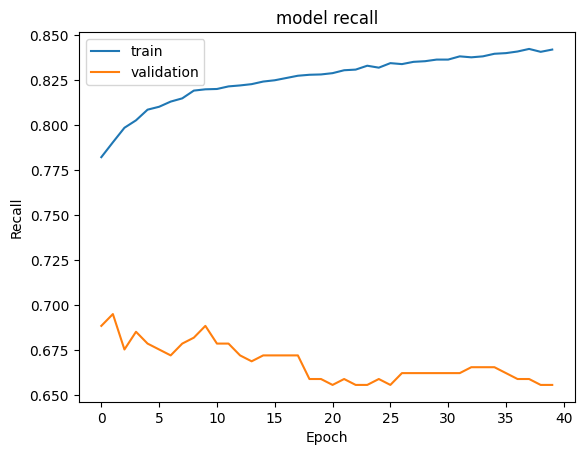

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      5574
           1       0.87      0.81      0.84      5574

    accuracy                           0.85     11148
   macro avg       0.85      0.85      0.85     11148
weighted avg       0.85      0.85      0.85     11148



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1195
           1       0.54      0.66      0.59       305

    accuracy                           0.82      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.83      0.82      0.82      1500



**Confusion matrix**

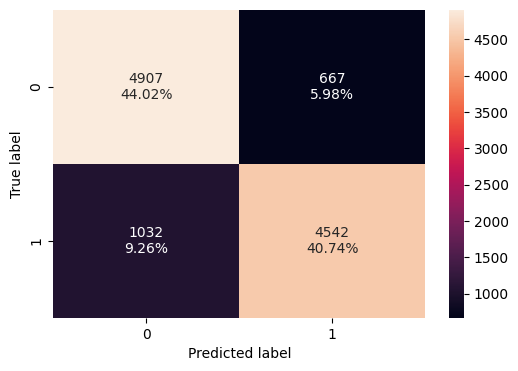

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

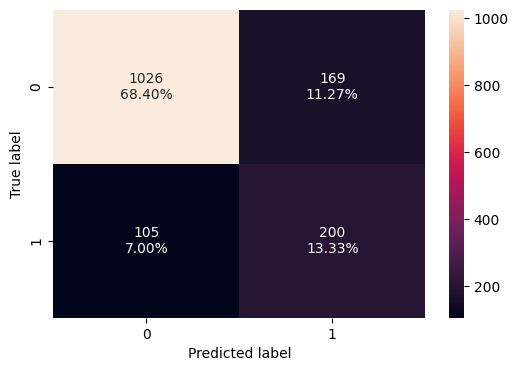

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
dropout_rate = 0.3

In [ ]:
#Initializing the model
model_5 = Sequential()
model_5.add(Dense(128,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(dropout_rate))
model_5.add(Dense(64,activation='tanh'))
model_5.add(Dropout(dropout_rate))
model_5.add(Dense(32,activation='relu'))
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.Adam()

# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=16,
    epochs=20,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.5864 - recall: 0.6635 - val_loss: 0.5095 - val_recall: 0.6721
Epoch 2/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5116 - recall: 0.7559 - val_loss: 0.4678 - val_recall: 0.6852
Epoch 3/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4738 - recall: 0.7775 - val_loss: 0.4354 - val_recall: 0.6820
Epoch 4/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4496 - recall: 0.7853 - val_loss: 0.4213 - val_recall: 0.6918
Epoch 5/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4396 - recall: 0.7978 - val_loss: 0.4140 - val_recall: 0.6984
Epoch 6/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4294 - recall: 0.7998 - val_loss: 0.4129 - val_recall: 0.7082
Epoch 7/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4294 - recall: 0.8003 - val_loss: 0.4075 - val_recall: 0.7213
Epoch 8/20
697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4270 - recall: 0.8038 - val_loss: 0.4009 - val_recall: 0.7115
Epoch 9/

**Loss function**

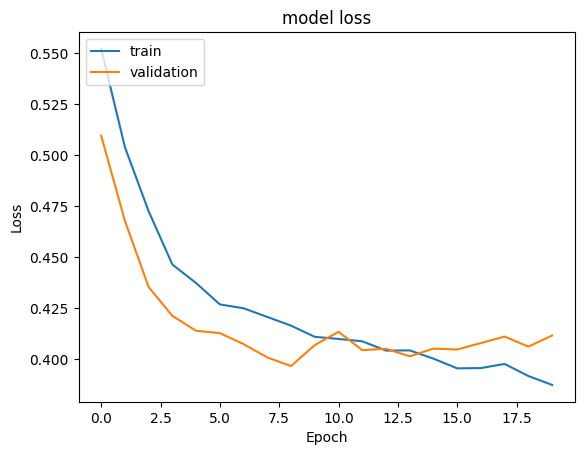

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

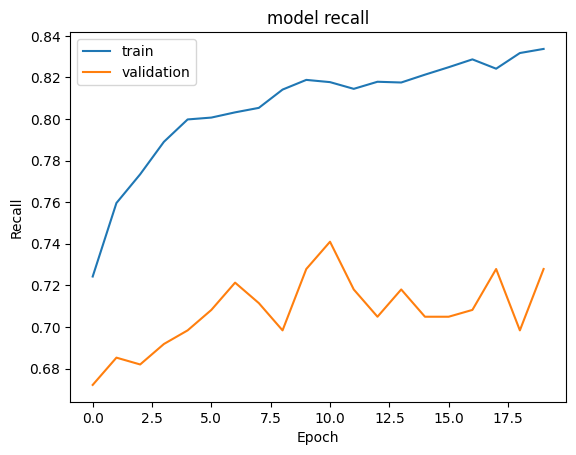

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5574
           1       0.84      0.84      0.84      5574

    accuracy                           0.84     11148
   macro avg       0.84      0.84      0.84     11148
weighted avg       0.84      0.84      0.84     11148



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1195
           1       0.52      0.73      0.61       305

    accuracy                           0.81      1500
   macro avg       0.72      0.78      0.74      1500
weighted avg       0.84      0.81      0.82      1500



**Confusion matrix**

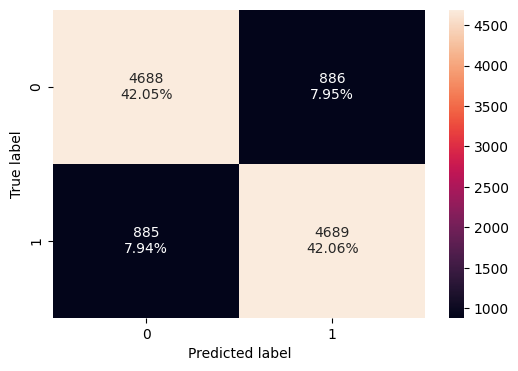

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

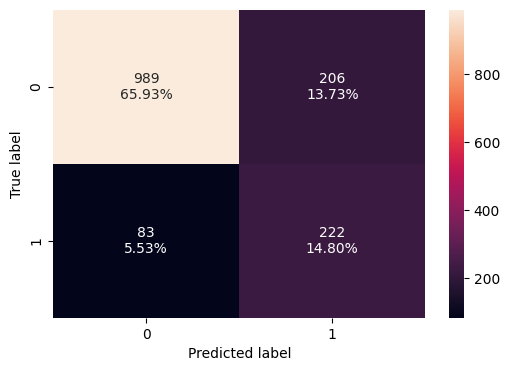

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.000000
NN with Adam,0.549790
NN with Adam & Dropout,0.513324
NN with SMOTE & SGD,0.752960
NN with SMOTE & Adam,0.814855
"NN with SMOTE,Adam & Dropout",0.841227


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.000000
NN with Adam,0.508197
NN with Adam & Dropout,0.504918
NN with SMOTE & SGD,0.701639
NN with SMOTE & Adam,0.655738
"NN with SMOTE,Adam & Dropout",0.727869


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.000000
NN with Adam,0.041593
NN with Adam & Dropout,0.008406
NN with SMOTE & SGD,0.051321
NN with SMOTE & Adam,0.159117
"NN with SMOTE,Adam & Dropout",0.113358


In [ ]:
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1194
           1       0.49      0.71      0.58       306

    accuracy                           0.79      1500
   macro avg       0.71      0.76      0.72      1500
weighted avg       0.83      0.79      0.81      1500



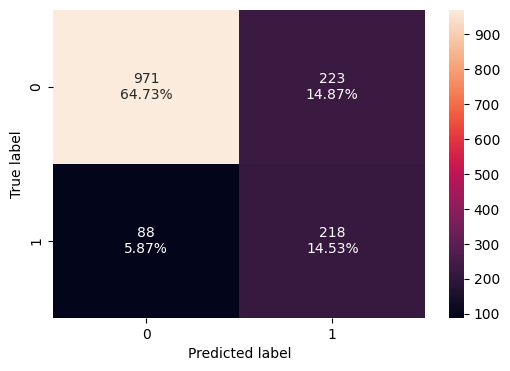

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

*


<font size=6 color='blue'>Power Ahead</font>
___